In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
topics = pd.read_csv('../../DataPlus/dvd_topic_modeling_with_distributions.csv')

In [5]:
topics.head(3)

,Unnamed: 0,Unnamed: 0.1,Tx3,Advice1,Anx11,Anx111,Anx112,Anx113,Anx12,Anx13,...,Convo_1,Convo_2,Doctor_1,Doctor_2,Convo_1_lemmatized,Convo_1_corp,radiation_topic,active_surveillance_topic,appt_topic,surgery_topic
0,263,263,1.0,SR,NaN,NaN,0.0,0.0,0.0,1.0,...,l394r1 interview length 014034 legend pt patie...,l394u2 interview length 003455 legend pt patie...,NaN,NaN,"['interview_length', 'significant', 'saw', 'su...","[(0, 1), (1, 2), (2, 1), (3, 4), (4, 31), (5, ...",0.380425,0.013018,0.000000,0.500840
1,264,264,2.0,A,0.0,1.0,NaN,0.0,NaN,0.0,...,l371u1 interview length 004701 legend pt patie...,l371r2 interview length 005058 legend pt patie...,NaN,NaN,"['interview_length', 'significant', 'person', ...","[(2, 1), (4, 2), (7, 1), (8, 3), (12, 2), (16,...",0.107739,0.000000,0.172553,0.718799
2,265,265,2.0,A,2.0,3.0,2.0,2.0,3.0,2.0,...,t062u1 interview length 02507 legend pt patien...,NaN,NaN,NaN,"['interview_length', 'significant', 'significa...","[(4, 1), (9, 1), (12, 1), (17, 1), (19, 2), (2...",0.173313,0.119528,0.189936,0.390042


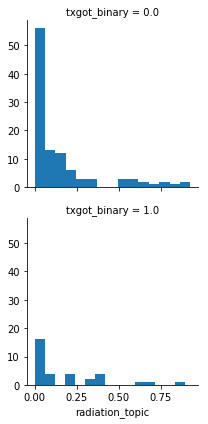

In [39]:
topic1 = sns.FacetGrid(topics, row="txgot_binary")
topic1 = topic1.map(plt.hist, "radiation_topic", bins=15)

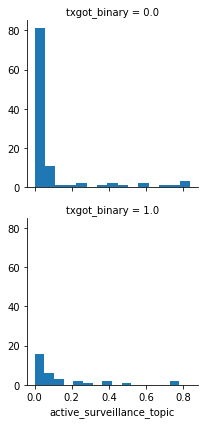

In [38]:
topic2 = sns.FacetGrid(topics, row="txgot_binary")
topic2 = topic2.map(plt.hist, "active_surveillance_topic", bins=15)

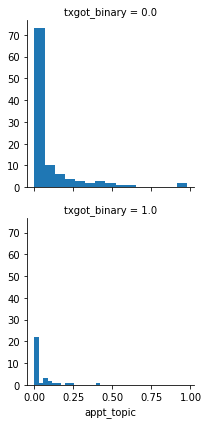

In [37]:
topic3 = sns.FacetGrid(topics, row="txgot_binary")
topic3 = topic3.map(plt.hist, "appt_topic", bins=15)

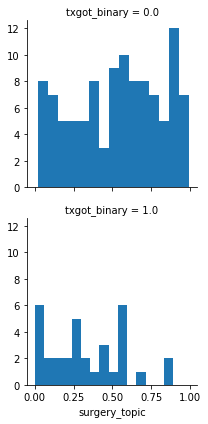

In [35]:
topic4 = sns.FacetGrid(topics, row="txgot_binary")
topic4 = topic4.map(plt.hist, "surgery_topic", bins=15)

In [50]:
import GeneralModel as gm

In [54]:
topic_df = gm.prepare_df(topics, cont_vars=['radiation_topic', 'active_surveillance_topic', 'appt_topic', 'surgery_topic'], cat_vars=[])

# of Data Points: 140


In [55]:
gm.general_model(topic_df, algorithm='rf', folds=5)



F-score: 0.269
AUC: 0.548


(0.26938221317040056,
 {'positive precision': 0.4266666666666667,
  'positive recall': 0.19682539682539682,
  'negative precision': 0.7848169914950999,
  'negative recall': 0.8997113997113997},
 0.5482683982683981,
                      Feature    Weight
 0            radiation_topic  0.196494
 1  active_surveillance_topic  0.285732
 2                 appt_topic  0.160649
 3              surgery_topic  0.357125)

In [58]:
added_topic_df = gm.prepare_df(topics, cont_vars=['radiation_topic', 'active_surveillance_topic', 'appt_topic', 'surgery_topic'], cat_vars=['gleason'])

# of Data Points: 140


In [59]:
gm.general_model(added_topic_df, algorithm='rf', folds=5)



F-score: 0.348
AUC: 0.581


(0.3475976121851959,
 {'positive precision': 0.5661111111111111,
  'positive recall': 0.25079365079365074,
  'negative precision': 0.7972716344310548,
  'negative recall': 0.9105339105339106},
 0.5806637806637805,
                      Feature    Weight
 0            radiation_topic  0.207926
 1  active_surveillance_topic  0.234317
 2                 appt_topic  0.159774
 3              surgery_topic  0.303006
 4                          7  0.094976)

In [70]:
gleason_df = gm.prepare_df(topics, cat_vars=['gleason', 'Advice1'], cont_vars=['age'])

# of Data Points: 135


In [71]:
gm.general_model(gleason_df, algorithm='lr', folds=5)



F-score: 0.475
AUC: 0.659


(0.4746034303308349,
 {'positive precision': 0.5868253968253968,
  'positive recall': 0.39841269841269844,
  'negative precision': 0.8395783443609531,
  'negative recall': 0.9203174603174603},
 0.6593650793650794,
   Feature    Weight
 0     age  0.441218
 1       7 -0.770031
 2      AR -0.234905
 3      AS -0.203498
 4     ASR  1.064160
 5       R  0.950786
 6       S  0.727385
 7      SR  1.774917)